IMPORT REQUIRED LIBRARIES



In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [ ]:
## loading the dataset

df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


UNIVARIATE ANALYSIS



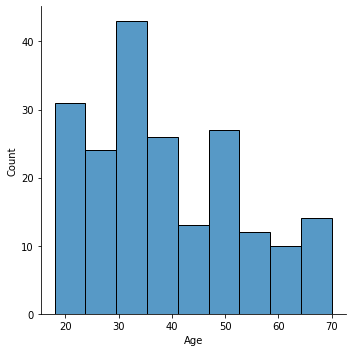

In [ ]:
sns.displot(df.Age)

BIVARIATE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


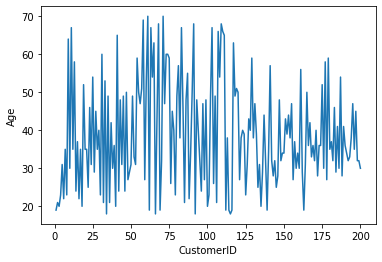

In [ ]:
sns.lineplot(df.CustomerID,df.Age)

MULTIVARIATE ANALYSIS

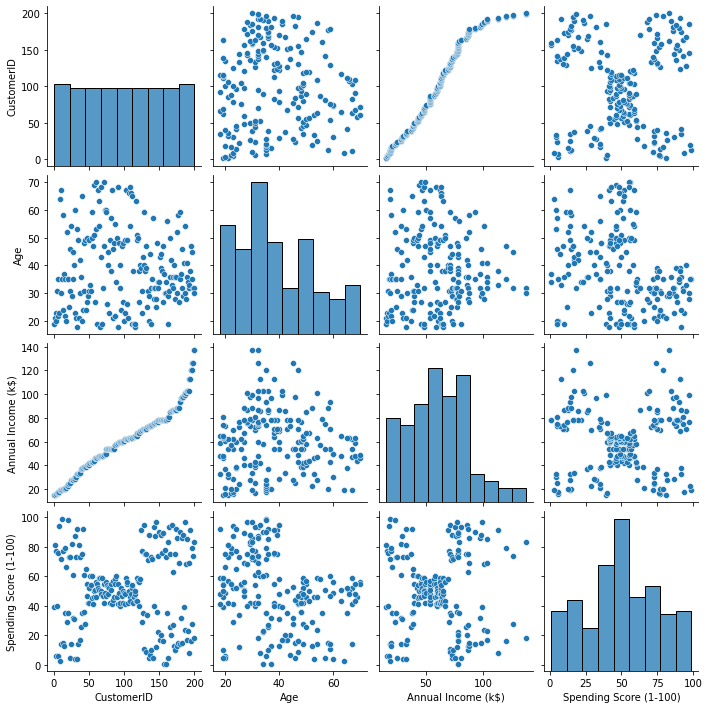

In [ ]:
sns.pairplot(df)

DESCRIPTIVE STATISTICS

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CHECKING FOR MISSING VALUES

In [ ]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

OUTLIER CHECKING

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


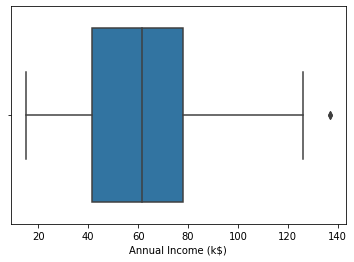

In [ ]:
sns.boxplot(df['Annual Income (k$)'])

In [ ]:
from scipy import stats

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


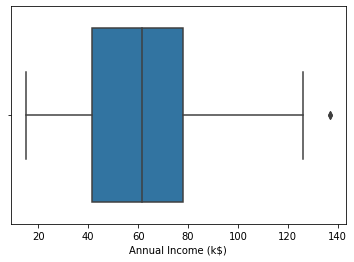

In [ ]:
sns.boxplot(df['Annual Income (k$)'])
                                  

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

ENCODING

In [ ]:
from sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()
label=le.fit_transform(df['Gender'])
df['Gender']=label

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

SCALING

In [ ]:
X =df.drop('Spending Score (1-100)',axis=1)
Y=df['Spending Score (1-100)']

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,-1.723412,1.128152,-1.424569,-1.738999
1,-1.706091,1.128152,-1.281035,-1.738999
2,-1.688771,-0.886405,-1.352802,-1.700830
3,-1.671450,-0.886405,-1.137502,-1.700830
4,-1.654129,-0.886405,-0.563369,-1.662660


 KMEANS CLUSTERING

In [ ]:
new_df =df.iloc[:,:-1]
new_df.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [ ]:
new_df.shape

(200, 4)

In [ ]:
from sklearn import cluster

In [ ]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(new_df)
    error.append(kmeans.inertia_)

In [ ]:
error

[842808.06,
 254375.02790279023,
 138716.48711070663,
 95392.76089176608,
 74339.55121941707,
 63023.88081677608,
 53573.00760399022,
 44998.052643910836,
 38962.28138017457,
 34773.099870413454]

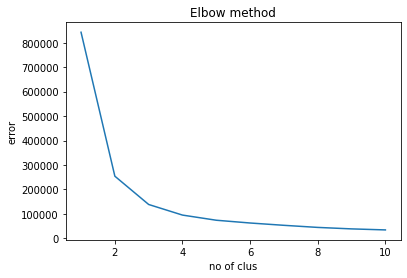

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [ ]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)


In [ ]:
km_model.fit(new_df)


KMeans(n_clusters=3, random_state=0)

In [ ]:
ykmeans =km_model.predict(new_df)
ykmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
km_model.predict([[1,1,19,15]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=int32)

In [ ]:
new_df['kclus'] = pd.Series(ykmeans)

In [ ]:
y=new_df.kclus
y

0      2
1      2
2      2
3      2
4      2
      ..
195    0
196    0
197    0
198    0
199    0
Name: kclus, Length: 200, dtype: int32

In [ ]:
new_df.head()

,CustomerID,Gender,Age,Annual Income (k$),kclus
0,1,1,19,15,2
1,2,1,21,15,2
2,3,0,20,16,2
3,4,0,23,16,2
4,5,0,31,17,2


In [ ]:
X= new_df.iloc[:,:-1]
X

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17
...,...,...,...,...
195,196,0,35,120
196,197,0,45,126
197,198,1,32,126
198,199,1,32,137


TRAIN TEST AND SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [ ]:
X_train.shape

(140, 4)

In [ ]:
y_train.shape

(140,)

In [ ]:
y_test.shape

(60,)

In [ ]:
X_test.shape

(60, 4)

MODEL BUILDING

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=4)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4)

In [ ]:
pred_test = model.predict(X_test)
pred_test

array([2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 1,
       0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 2, 2], dtype=int32)

In [ ]:
pred_train = model.predict(X_train)
pred_train

array([1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1, 1,
       2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0,
       2, 1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2,
       2, 2, 1, 1, 0, 1, 2, 0], dtype=int32)

In [ ]:
# evalating model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print('Training accuracy: ', accuracy_score(y_train,pred_train))
print('Testing accuracy: ', accuracy_score(y_test,pred_test))


Training accuracy:  1.0
Testing accuracy:  0.9833333333333333


In [ ]:
pd.crosstab(y_test,pred_test)

col_0,0,1,2
kclus,,,
0,20,0,0
1,0,20,1
2,0,0,19


In [ ]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.97        19

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

